In [1]:
!pip install pandas matplotlib seaborn

In [4]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv.zip to googleplaystore.csv.zip


In [6]:
import zipfile

# Unzipping the file
with zipfile.ZipFile('googleplaystore.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [9]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
data = pd.read_csv('googleplaystore.csv')

In [8]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
import pandas as pd

In [12]:
data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '').str.replace('Free', '0')
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

In [13]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

In [32]:
data[col] = pd.to_numeric(data[col], errors='coerce')
data[col] = data[col].fillna(0).astype(float)

In [34]:
for col in data.columns:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        data[col].fillna(0, inplace=True)  # Fill numerical NaN values with 0
    else:
        data[col].fillna('Unknown', inplace=True)  # Fill categorical NaN with 'Unknown'

# Now let's check the cleaned data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  int64  
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB
None


<ipython-input-34-5c4f33e9db9c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna('Unknown', inplace=True)  # Fill categorical NaN with 'Unknown'
<ipython-input-34-5c4f33e9db9c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

EDA

APP Category Distribution

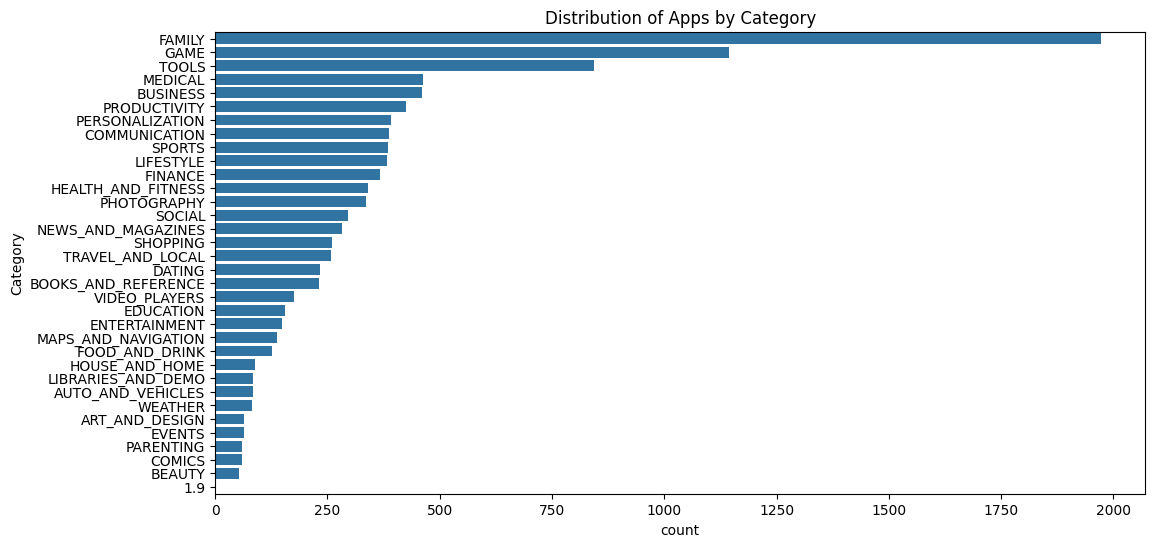

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index)
plt.title('Distribution of Apps by Category')
plt.show()

User Ratings Analysis


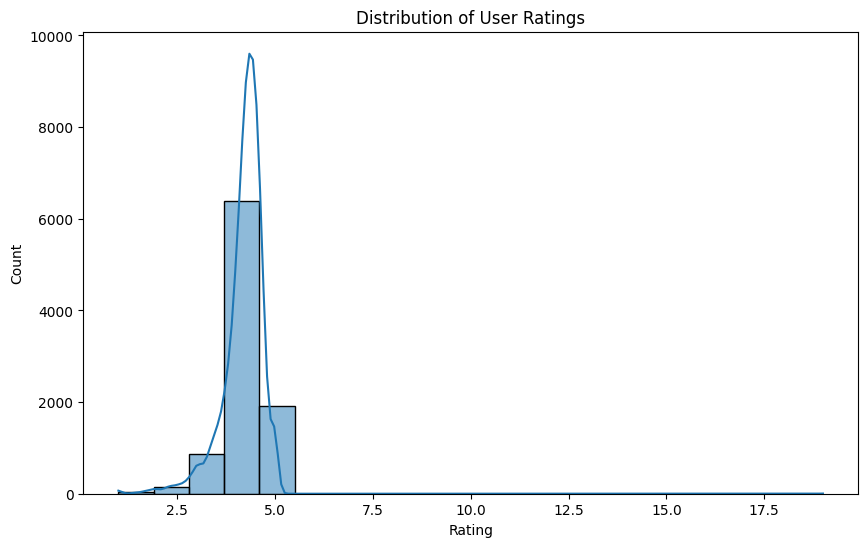

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of User Ratings')
plt.show()

App Popularity (Installs)

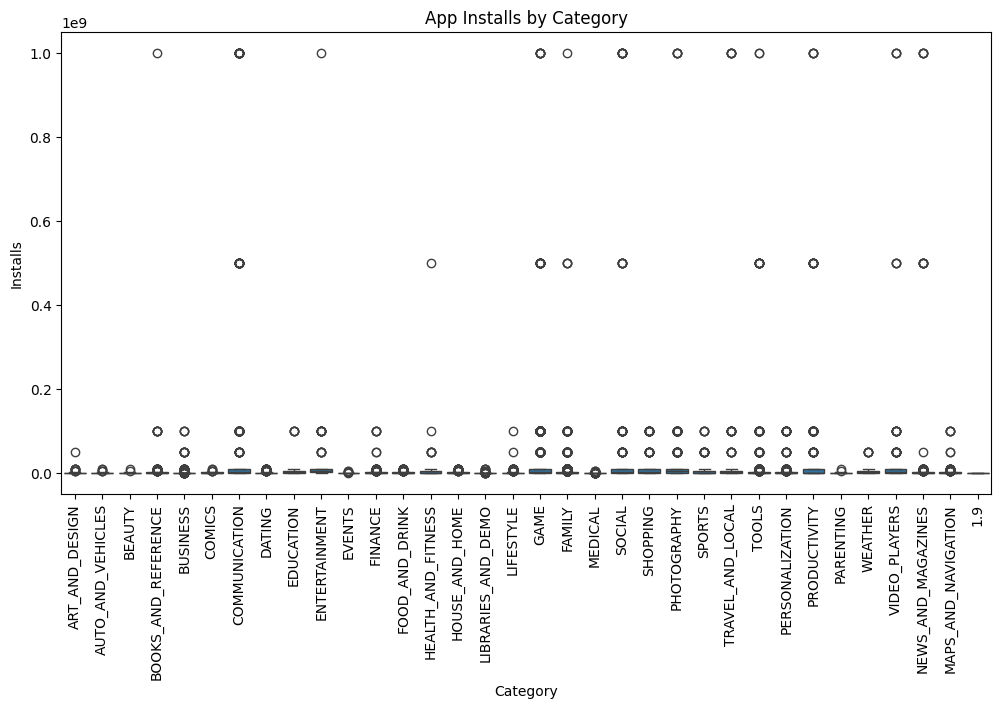

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Installs', data=data)
plt.xticks(rotation=90)
plt.title('App Installs by Category')
plt.show()

Monetization Strategies

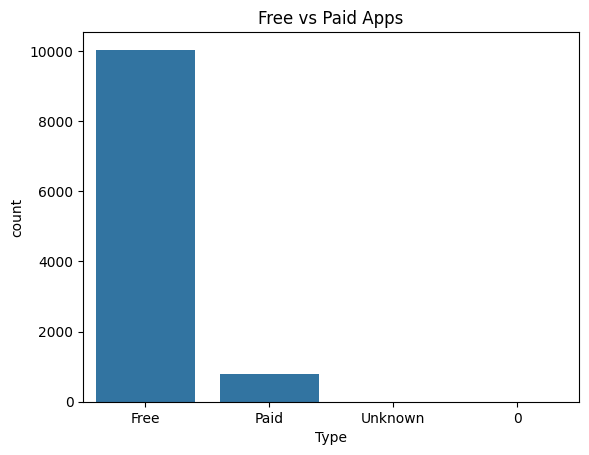

In [19]:
sns.countplot(x='Type', data=data)
plt.title('Free vs Paid Apps')
plt.show()

Pricing Analysis

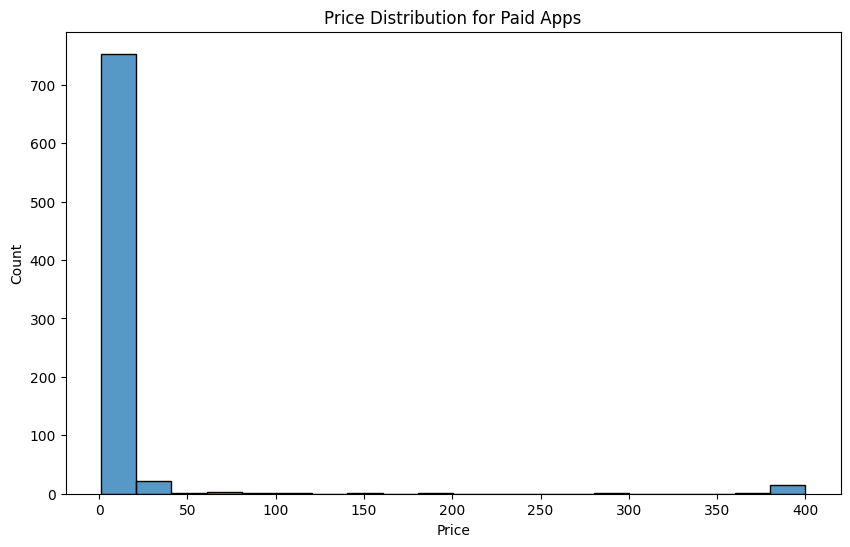

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Type'] == 'Paid']['Price'].str.replace('$', '').astype(float), bins=20)
plt.title('Price Distribution for Paid Apps')
plt.show()

**Project Summary: Google Play Store Apps EDA
 **
 This project involved exploratory data analysis (EDA) on Google Play Store apps to uncover key factors driving app success. We analyzed user ratings, downloads, app categories, and monetization strategies.
 Key Insights:


*    Ratings Distribution: Identified trends in user ratings and common scores
*   Category Performance: Revealed popular app categories with high user engagement

*   Monetization: Found that free apps had higher download counts compared to paid apps
*   Reviews & Installs: Showed strong correlations between reviews, installs, and app success.

**Conclusion**:
The EDA provided valuable insights into factors that contribute to an app's popularity on the Google Play Store. By understanding user preferences, app categories, and monetization approaches, developers and marketers can better optimize their strategies to enhance app visibility, improve user satisfaction, and drive more downloads. The findings offer a roadmap for app success in a competitive marketplace.

